In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Dane_bank_nowe.csv', sep=',')

In [3]:
df_copy = df.copy(deep = True)

In [4]:
df_copy.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,886607.90,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,916554.56,0
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,849781.25,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,1367384.50,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,1504164.20,0


In [5]:
df_copy.duplicated().sum()

0

Usuwam zbedne kolumny (na razie Estimated salary uznalam za niewarta dziubania)

In [6]:
to_drop = ['RowNumber', 'Surname', 'CustomerId', 'Unnamed: 0']
df_copy.drop(to_drop, inplace=True, axis=1)

In [7]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,886607.90,1
1,608,Spain,Female,41,1,83807.86,1,0,1,916554.56,0
2,502,France,Female,42,8,159660.80,3,1,0,849781.25,1
3,699,France,Female,39,1,0.00,2,0,0,1367384.50,0
4,850,Spain,Female,43,2,125510.82,1,1,1,1504164.20,0


In [8]:
df_copy.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df_copy.Gender.unique()

array(['Female', 'Male'], dtype=object)

Zamiana stringow na wartosci numeryczne

In [10]:
d = {'France':1,'Spain':2,'Germany':3, 'Female':0, 'Male':1}
df_copy = df_copy.replace(d)

In [11]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,886607.90,1
1,608,2,0,41,1,83807.86,1,0,1,916554.56,0
2,502,1,0,42,8,159660.80,3,1,0,849781.25,1
3,699,1,0,39,1,0.00,2,0,0,1367384.50,0
4,850,2,0,43,2,125510.82,1,1,1,1504164.20,0


In [12]:
df_copy.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,650.528800,1.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,1.130141e+06,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,3.078528e+05,0.402769
min,350.000000,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.914779e+05,0.000000
25%,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,8.728450e+05,0.000000
50%,652.000000,1.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,1.160135e+06,0.000000
75%,718.000000,3.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,1.363969e+06,0.000000
max,850.000000,3.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.730501e+06,1.000000


Eksploracja danych:

In [13]:
df_copy.groupby(['Exited']).size()

Exited
0    7963
1    2037
dtype: int64

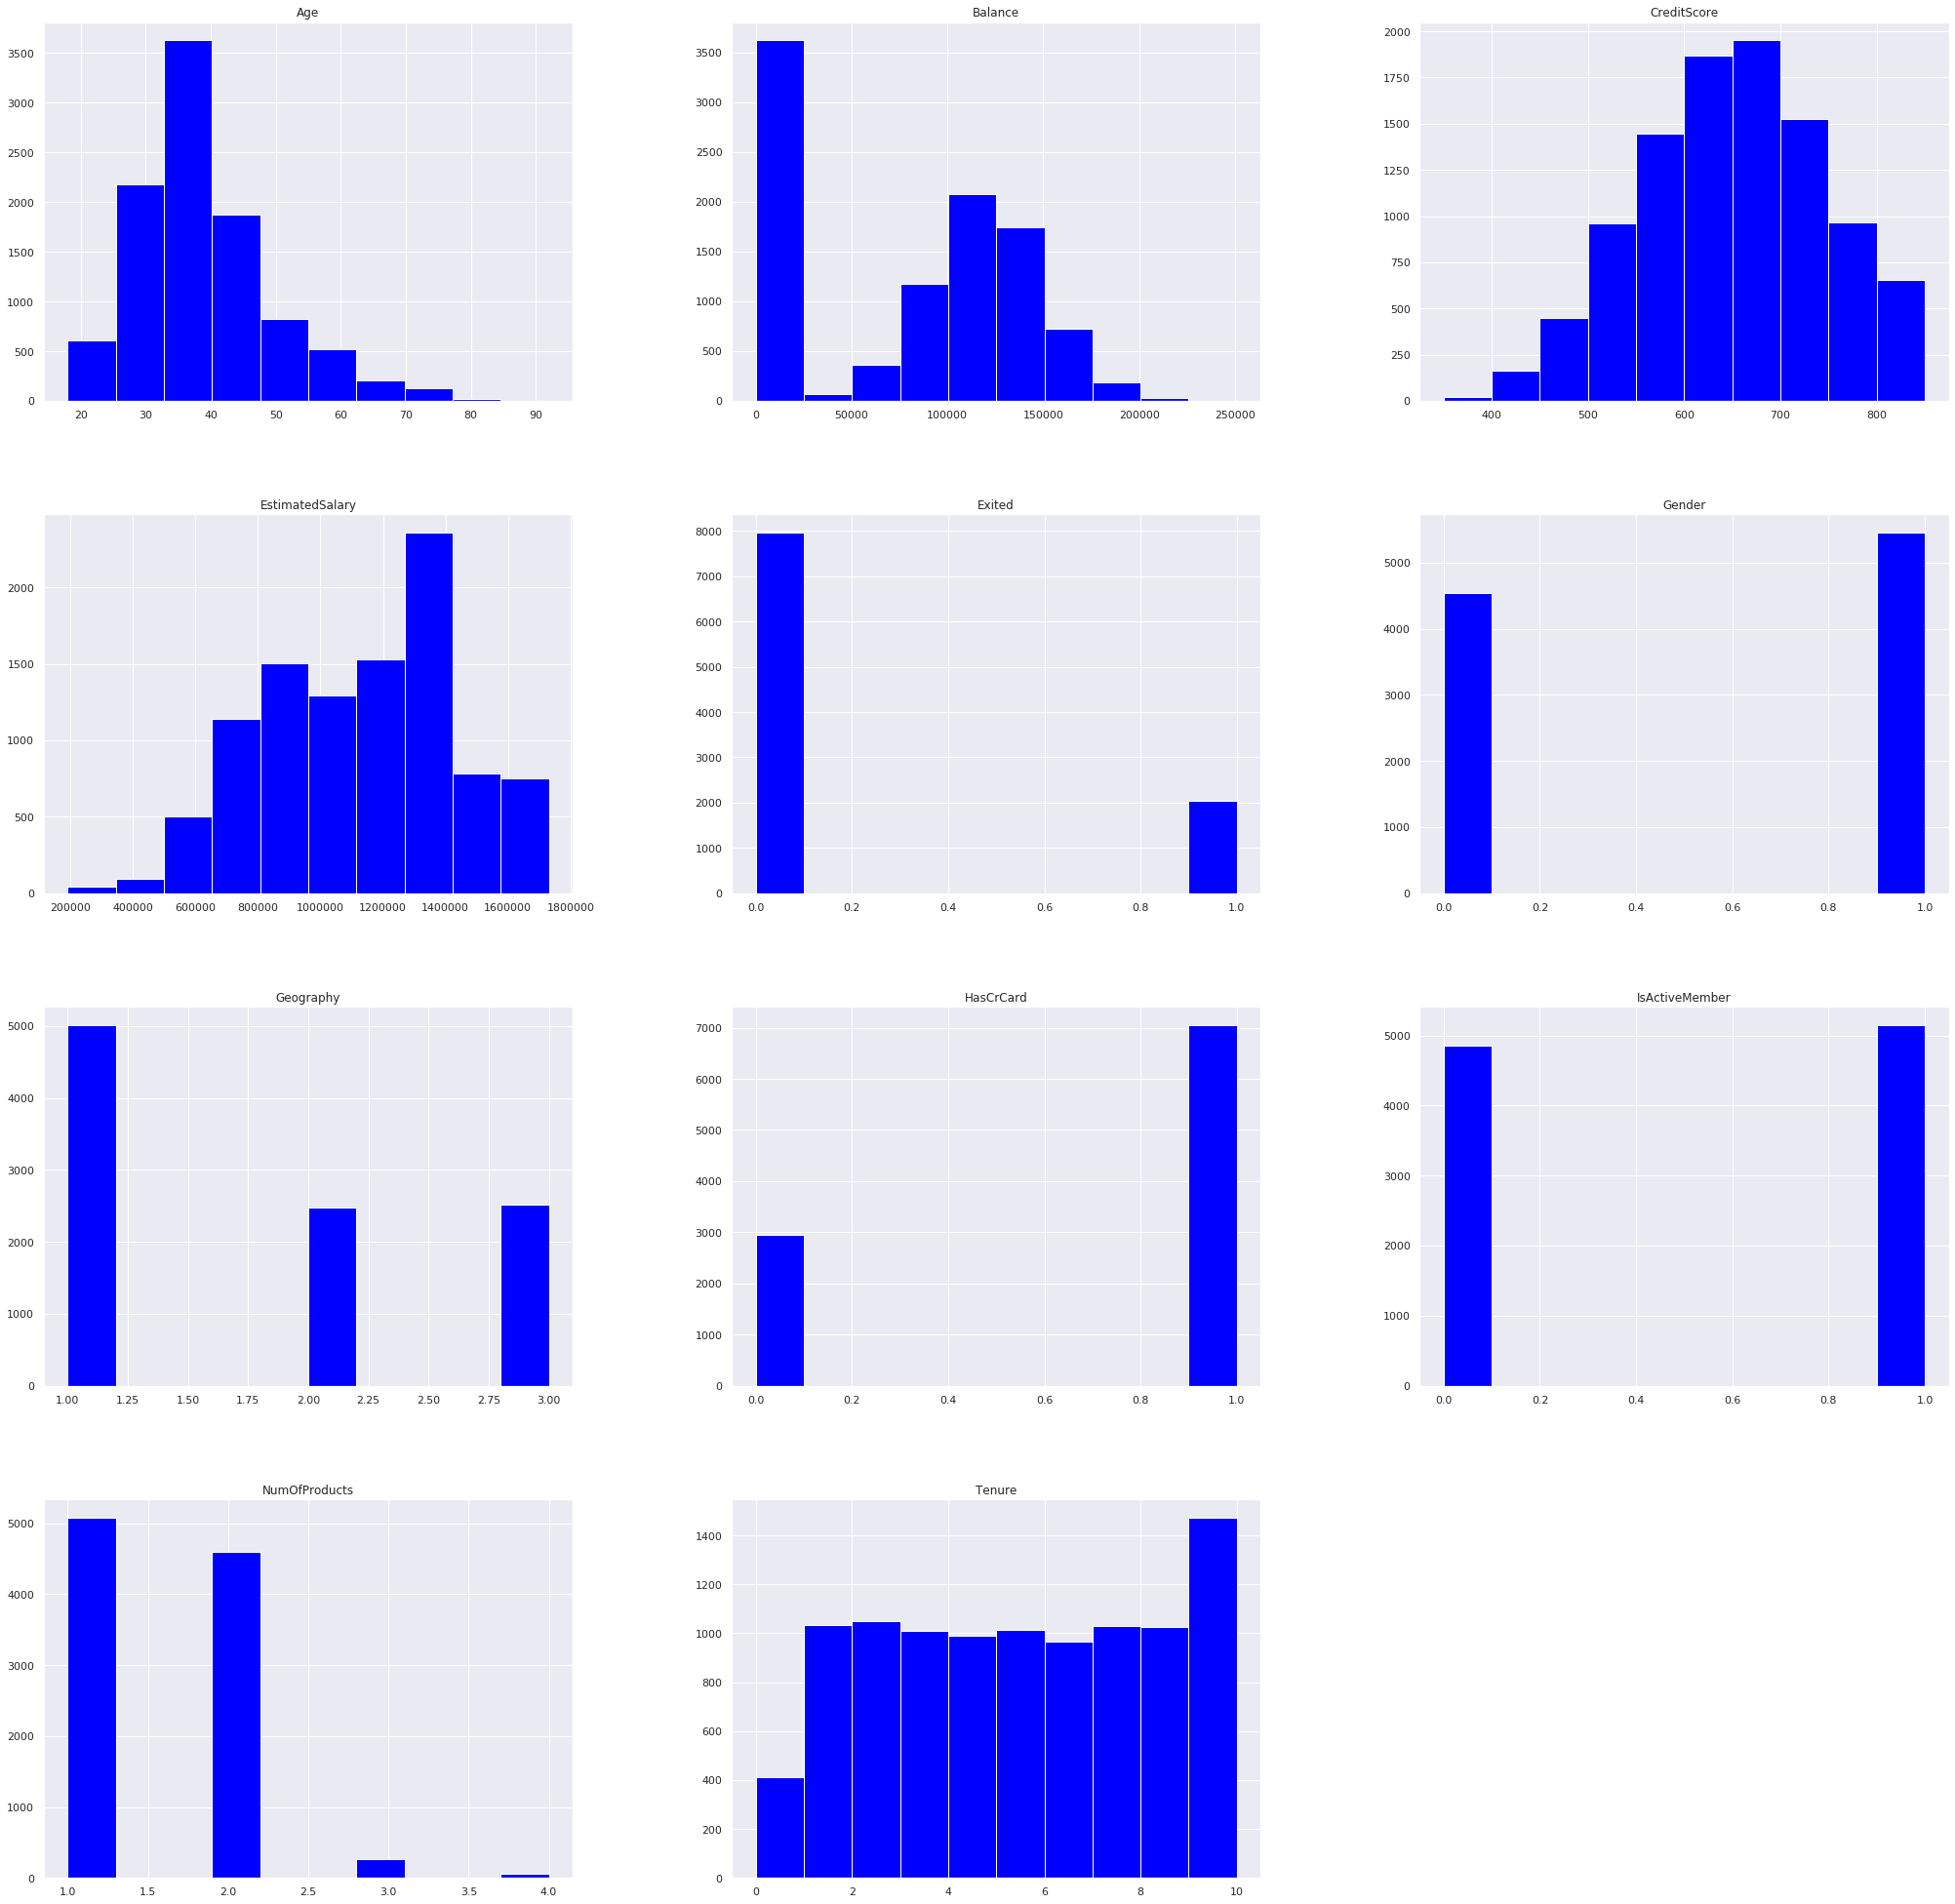

In [14]:
sns.set()
df_copy.hist(figsize=(35,35), color='blue')
plt.show()

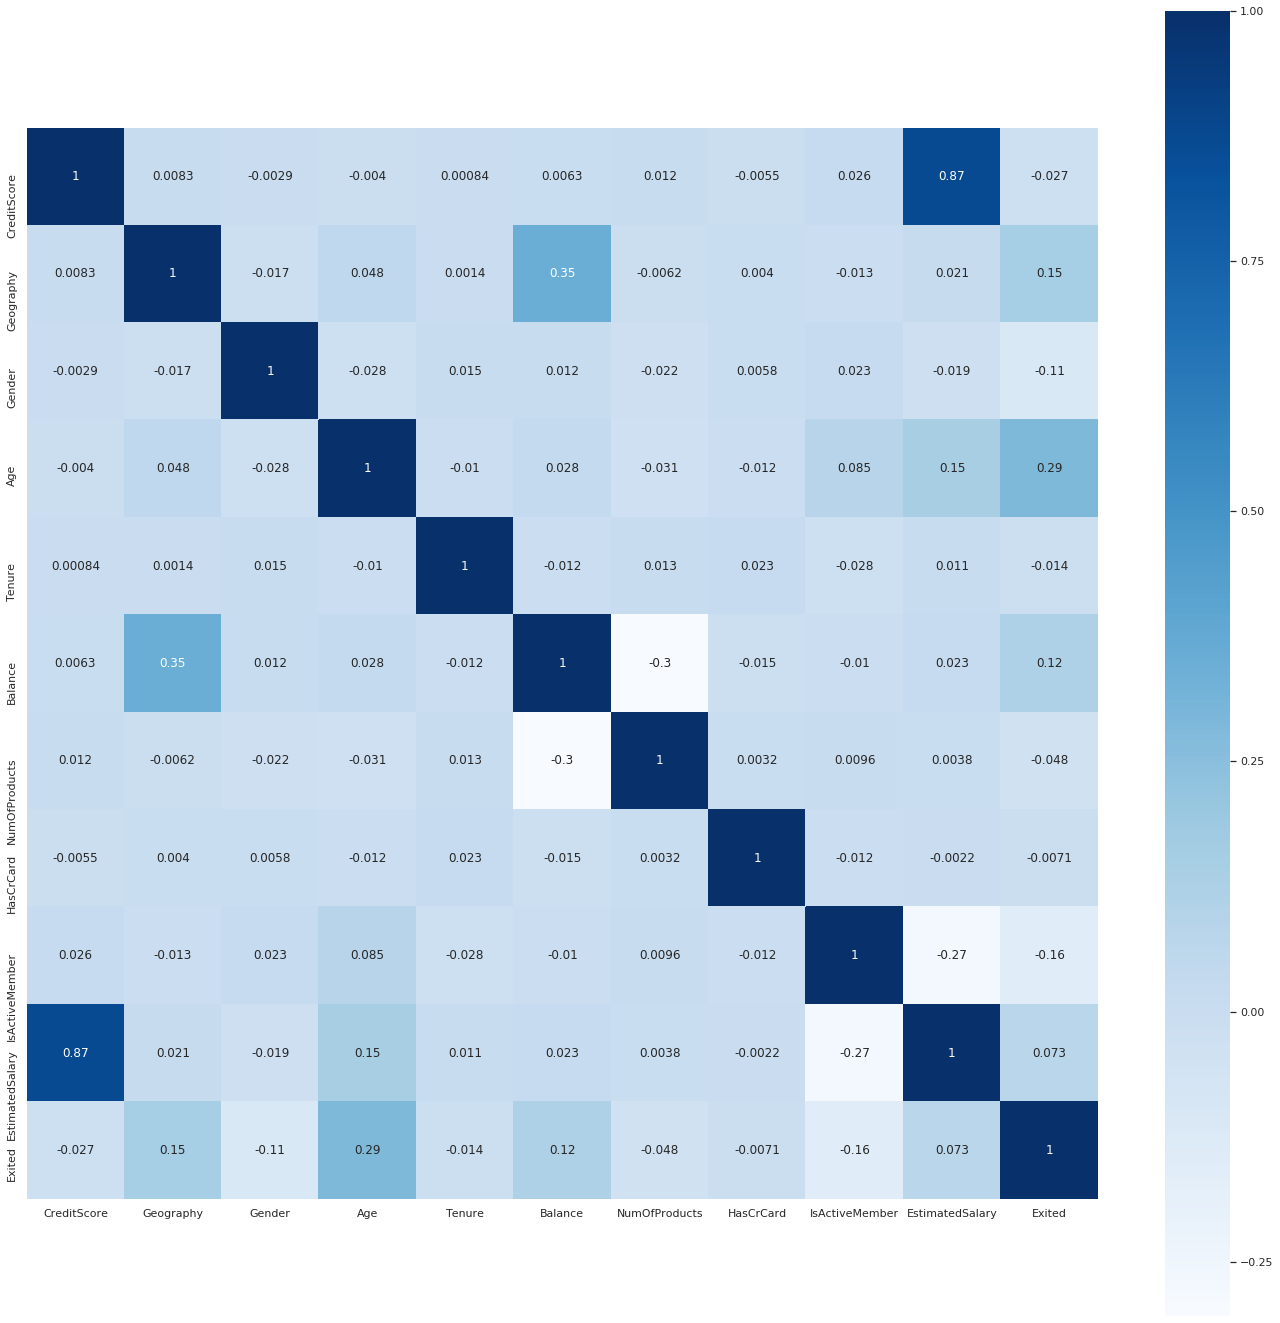

In [15]:
correlation = df_copy.corr()

import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(24,24))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Cechy najsilniej skorelowane z 'exited' to:
    * Age (0.29)
    * IsActiveMember (-0.16)
    * Geography (0.15)
I ewentualnie:
    * Balance (0.12)
    * Gender (-0.11)
    
Czy wystepuja jakies korelacje miedzy nimi:
    * Balance & Geography (0.35) <- na to zwrocic uwage projektujac model

# Modele

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
from sklearn.linear_model import LogisticRegression

### RLog - Wszystkie zmienne

In [18]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [19]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.29,random_state=42, stratify=y)

In [21]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [22]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train.ravel())

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
logreg_model.score(X_test, y_test)

0.663448275862069

In [24]:
y_pred = logreg_model.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.76      2309
           1       0.34      0.70      0.46       591

    accuracy                           0.66      2900
   macro avg       0.62      0.68      0.61      2900
weighted avg       0.78      0.66      0.70      2900



In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.33655172413793105
Mean Squared Logaritmic Error: 0.16169729020143606
Root Mean Squared Error: 0.5801307819258784


### RLog - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [27]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [28]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [30]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [31]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train.ravel())

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
logreg_model.score(X_test, y_test)

0.2035

In [33]:
y_pred = logreg_model.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7965
Mean Squared Logaritmic Error: 0.3826808255858475
Root Mean Squared Error: 0.892468486838611


### RLog - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [36]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [37]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [39]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [40]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train.ravel())

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
logreg_model.score(X_test, y_test)

0.7066666666666667

In [42]:
y_pred = logreg_model.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      2389
           1       0.38      0.73      0.51       611

    accuracy                           0.71      3000
   macro avg       0.65      0.72      0.65      3000
weighted avg       0.80      0.71      0.73      3000



In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.29333333333333333
Mean Squared Logaritmic Error: 0.1409328840826724
Root Mean Squared Error: 0.5416025603090641


## Drzewo decyzyjne (DT)

In [45]:
from sklearn.tree import DecisionTreeClassifier

### DT - wszystkie zmienne

In [46]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [47]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42, stratify=y)

In [49]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [50]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [51]:
dt_model.score(X_test, y_test)

0.7902857142857143

In [52]:
y_pred = dt_model.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2787
           1       0.49      0.48      0.48       713

    accuracy                           0.79      3500
   macro avg       0.68      0.67      0.68      3500
weighted avg       0.79      0.79      0.79      3500



In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.20971428571428571
Mean Squared Logaritmic Error: 0.10075786063313139
Root Mean Squared Error: 0.45794572354623614


### DT - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [55]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [56]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.31,random_state=42, stratify=y)

In [58]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [59]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [60]:
dt_model.score(X_test, y_test)

0.7483870967741936

In [61]:
y_pred = dt_model.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2469
           1       0.39      0.40      0.39       631

    accuracy                           0.75      3100
   macro avg       0.62      0.62      0.62      3100
weighted avg       0.75      0.75      0.75      3100



In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.25161290322580643
Mean Squared Logaritmic Error: 0.12088817769554747
Root Mean Squared Error: 0.501610310127101


### DT - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [64]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [65]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.29,random_state=42, stratify=y)

In [67]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [68]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [69]:
dt_model.score(X_test, y_test)

0.733103448275862

In [70]:
y_pred = dt_model.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2309
           1       0.41      0.67      0.51       591

    accuracy                           0.73      2900
   macro avg       0.65      0.71      0.66      2900
weighted avg       0.80      0.73      0.75      2900



In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.26689655172413795
Mean Squared Logaritmic Error: 0.1282312526802372
Root Mean Squared Error: 0.5166203167938113


## Random Forest (RF)

In [73]:
from sklearn.ensemble import RandomForestClassifier

### RF - wszystkie zmienne

In [74]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [75]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [77]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [78]:
rf_model = RandomForestClassifier(n_estimators=27, random_state = 0)
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=27,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
rf_model.score(X_test, y_test)

0.8416666666666667

In [80]:
y_pred = rf_model.predict(X_test)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2389
           1       0.62      0.56      0.59       611

    accuracy                           0.84      3000
   macro avg       0.76      0.74      0.75      3000
weighted avg       0.84      0.84      0.84      3000



In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15833333333333333
Mean Squared Logaritmic Error: 0.07607172720371523
Root Mean Squared Error: 0.39791121287711073


### RF - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [83]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [84]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.31,random_state=42, stratify=y)

In [86]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [87]:
rf_model = RandomForestClassifier(n_estimators=10, random_state = 0)
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [88]:
rf_model.score(X_test, y_test)

0.7551612903225806

In [89]:
y_pred = rf_model.predict(X_test)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2469
           1       0.41      0.48      0.45       631

    accuracy                           0.76      3100
   macro avg       0.64      0.65      0.64      3100
weighted avg       0.77      0.76      0.76      3100



In [91]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24483870967741936
Mean Squared Logaritmic Error: 0.11763349598835963
Root Mean Squared Error: 0.49481179217700477


### RF - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [92]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [93]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.29,random_state=42, stratify=y)

In [95]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [96]:
rf_model = RandomForestClassifier(n_estimators=15, random_state = 0)
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [97]:
rf_model.score(X_test, y_test)

0.723103448275862

In [98]:
y_pred = rf_model.predict(X_test)

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      2309
           1       0.40      0.68      0.50       591

    accuracy                           0.72      2900
   macro avg       0.65      0.71      0.65      2900
weighted avg       0.80      0.72      0.75      2900



In [100]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Logaritmic Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2768965517241379
Mean Squared Logaritmic Error: 0.13303578281941922
Root Mean Squared Error: 0.5262096081640262


## KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

### KNN - wszystkie zmienne

In [102]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [103]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [105]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [106]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train.ravel())
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [107]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1, 2]


In [108]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 72.1 % and k = [1, 2]


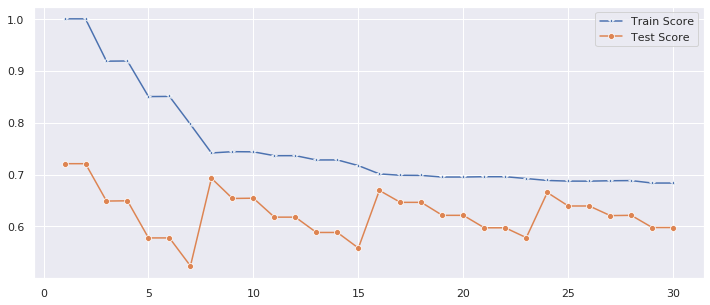

In [109]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [110]:
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train.ravel())
knn.score(X_test,y_test)

0.721

In [111]:
y_pred = knn.predict(X_test)

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1593
           1       0.31      0.30      0.31       407

    accuracy                           0.72      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.72      0.72      0.72      2000



In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.279
Mean Squared Error: 0.279
Root Mean Squared Error: 0.5282045058497703


### KNN - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [114]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [115]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [117]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [118]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train.ravel())
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [119]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 91.10162916989914 % and k = [1]


In [120]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.15 % and k = [2]


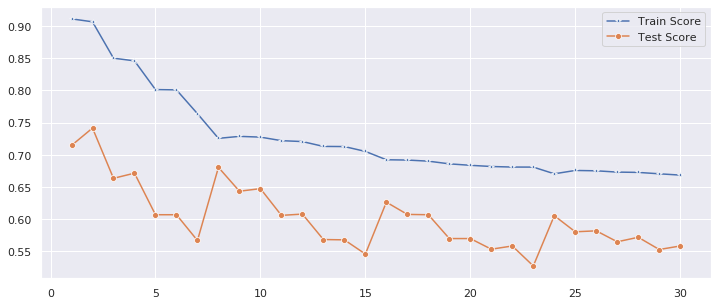

In [121]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [122]:
knn = KNeighborsClassifier(2)

knn.fit(X_train,y_train.ravel())
knn.score(X_test,y_test)

0.7415

In [123]:
y_pred = knn.predict(X_test)

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1593
           1       0.33      0.27      0.30       407

    accuracy                           0.74      2000
   macro avg       0.58      0.57      0.57      2000
weighted avg       0.72      0.74      0.73      2000



In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2585
Mean Squared Error: 0.2585
Root Mean Squared Error: 0.5084289527554464


### KNN - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [126]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [127]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [129]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [130]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train.ravel())
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [131]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 73.97207137315749 % and k = [26]


In [132]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.35 % and k = [2]


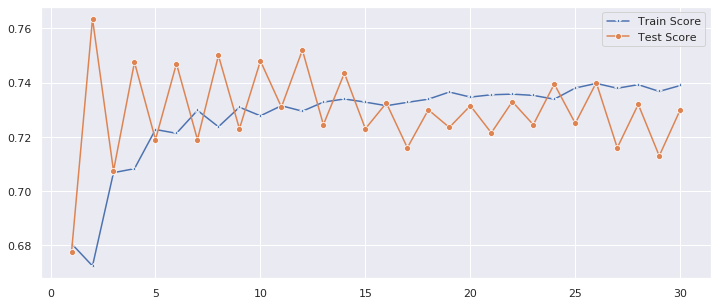

In [133]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [134]:
knn = KNeighborsClassifier(2)

knn.fit(X_train,y_train.ravel())
knn.score(X_test,y_test)

0.7635

In [135]:
y_pred = knn.predict(X_test)

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1593
           1       0.41      0.39      0.40       407

    accuracy                           0.76      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.76      0.76      0.76      2000



In [137]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2365
Mean Squared Error: 0.2365
Root Mean Squared Error: 0.48631265663151313


## BAYES

In [138]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### BAYES - wszystkie zmienne

In [139]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [140]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [142]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [143]:
model = GaussianNB()
model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [144]:
model.score(X_test, y_test)

0.639

In [145]:
y_pred = model.predict(X_test)

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      1593
           1       0.32      0.70      0.44       407

    accuracy                           0.64      2000
   macro avg       0.61      0.66      0.59      2000
weighted avg       0.77      0.64      0.67      2000



In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.361
Mean Squared Error: 0.361
Root Mean Squared Error: 0.6008327554319921


### BAYES - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [148]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [149]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [151]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [152]:
model = GaussianNB()
model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [153]:
model.score(X_test, y_test)

0.6985

In [154]:
y_pred = model.predict(X_test)

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1593
           1       0.37      0.71      0.49       407

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.70      0.73      2000



In [156]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3015
Mean Squared Error: 0.3015
Root Mean Squared Error: 0.5490901565316938


### BAYES - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [157]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [158]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [160]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [161]:
model = GaussianNB()
model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [162]:
model.score(X_test, y_test)

0.71

In [163]:
y_pred = model.predict(X_test)

In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



In [165]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.29
Mean Squared Error: 0.29
Root Mean Squared Error: 0.5385164807134504


## XG-BOOST

In [166]:
import xgboost as xgb

### XGB - wszystkie zmienne

In [167]:
X = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [168]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [170]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [171]:
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=123)
model.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [172]:
model.score(X_test, y_test)

0.794

In [173]:
y_pred = model.predict(X_test)

In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.50      0.77      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



In [175]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.206
Mean Squared Error: 0.206
Root Mean Squared Error: 0.4538722287164087


### XGB - Zmienne silniej skorelowane z 'Exited' 
(jedna para zmiennych objasniajacych ma korelacje 0.35)

In [176]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Balance', 'Gender']]
y = df_copy['Exited']

In [177]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [178]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [179]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [180]:
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=123)
model.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [181]:
model.score(X_test, y_test)

0.745

In [182]:
y_pred = model.predict(X_test)

In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1593
           1       0.42      0.71      0.53       407

    accuracy                           0.74      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.74      0.77      2000



In [184]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.255
Mean Squared Error: 0.255
Root Mean Squared Error: 0.5049752469181039


### XGB - Zmienne silniej skorelowane z 'Exited' 
(usuwam 'Balance' aby pozbyc sie korelacji miedzy zmiennymi objasniajacymi)

In [185]:
X = df_copy[['Age','IsActiveMember', 'Geography', 'Gender']]
y = df_copy['Exited']

In [186]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [187]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [188]:
train=pd.concat([X_train, y_train], axis=1)
train_1=train.loc[train['Exited']==1]
train=pd.concat([train, train_1, train_1, train_1])

X_train=train.drop('Exited', axis=1)
y_train=train['Exited']

In [189]:
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=123)
model.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [190]:
model.score(X_test, y_test)

0.748

In [191]:
y_pred = model.predict(X_test)

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1593
           1       0.43      0.72      0.54       407

    accuracy                           0.75      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.81      0.75      0.77      2000



In [193]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.252
Mean Squared Error: 0.252
Root Mean Squared Error: 0.5019960159204453


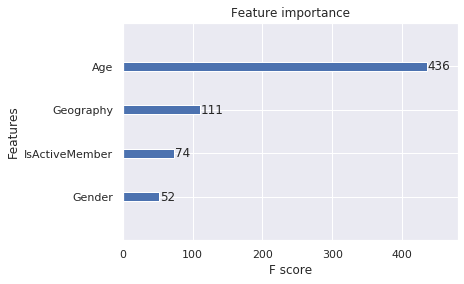

In [194]:
xgb.plot_importance(model)
plt.show()